In [1]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from pandas import Series, DataFrame
from collections import Counter, defaultdict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import KBinsDiscretizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from numpy.random import RandomState
#Загружаем данные
data = pd.read_excel('credit_train.xlsx')

In [2]:
#Заменяем пропущенные значения в age, score_shk, monthly_income и credit_sum 
data['age'] = np.where(data['age'].isnull(), data['age'].median(), data['age'])
data['score_shk'] = np.where(data['score_shk'].isnull(), data['score_shk'].median(), data['score_shk'])
data['credit_sum'] = np.where(data['credit_sum'].isnull(), data['credit_sum'].median(), data['credit_sum'])
data['monthly_income'] = np.where(data['monthly_income'].isnull(), data['monthly_income'].median(), data['monthly_income'])

In [3]:
data.drop('client_id', axis=1, inplace=True)

In [4]:
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,34.0,NaN,UMN,59998.00,10,2019-06-01 00:00:00,0.461599,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,F,34.0,MAR,UMN,10889.00,6,2019-01-01 00:00:00,0.461599,NaN,МОСКВА,35000.0,2.0,0.0,0
2,M,32.0,MAR,SPC,10728.00,12,2019-01-01 00:00:00,0.461599,NaN,ОБЛ САРАТОВСКАЯ,35000.0,5.0,0.0,0
3,F,27.0,NaN,SPC,12009.09,12,2019-01-01 00:00:00,0.461599,NaN,ОБЛ ВОЛГОГРАДСКАЯ,35000.0,2.0,0.0,0
4,M,45.0,NaN,SPC,21229.00,10,2019-01-01 00:00:00,0.421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,35000.0,1.0,0.0,0


In [5]:
data['living_region'] = np.where((data['living_region'] == 'КРАЙ КРАСНОДАРСКИЙ')
                                 |(data['living_region'] == 'КРАСНОДАРСКИЙ'), 'КРАСНОДАРСКИЙ КРАЙ', data['living_region'])

data['living_region'] = np.where((data['living_region'] == 'МОСКВА Г')
                                 |(data['living_region'] == 'Г МОСКВА')
                                 |(data['living_region'] == 'Г.МОСКВА')
                                 |(data['living_region'] == 'Г. МОСКВА'), 'МОСКВА', data['living_region'])

data['living_region'] = np.where((data['living_region'] == 'ОБЛ.МОСКОВСКАЯ')
                                 |(data['living_region'] == 'МОСКОВСКАЯ ОБЛ')
                                 |(data['living_region'] == 'МОСКОВСКАЯ')
                                 |(data['living_region'] == 'МОСКВОСКАЯ ОБЛ')
                                 |(data['living_region'] == 'МОСКОВСКАЯ ОБЛАСТЬ'), 'ОБЛ МОСКОВСКАЯ', data['living_region'])

data['living_region'] = np.where((data['living_region'] == 'САНКТ-ПЕТЕРБУРГ Г')
                                 |(data['living_region'] == 'Г. САНКТ-ПЕТЕРБУРГ'), 'САНКТ-ПЕТЕРБУРГ', data['living_region'])


data['living_region'] = np.where((data['living_region'] == 'РЕСП ТАТАРСТАН')
                                 |(data['living_region'] == 'РЕСПУБЛИКАТАТАРСТАН')
                                 |(data['living_region'] == 'РЕСПУБЛИКА ТАТАРСТАН'), 'ТАТАРСТАН РЕСП', data['living_region'])

data['living_region'] = np.where((data['living_region'] == 'РЕСП.БАШКОРТОСТАН')
                                 |(data['living_region'] == 'РЕСП. БАШКОРТОСТАН')
                                 |(data['living_region'] == 'БАШКОРТОСТАН')
                                 |(data['living_region'] == 'БАШКОРТОСТАН РЕСП'), 'РЕСП БАШКОРТОСТАН', data['living_region'])

data['living_region'] = np.where((data['living_region'] == 'ИРКУТСКАЯ ОБЛ')
                                 |(data['living_region'] == 'ИРКУТСКАЯ ОБЛАСТЬ'), 'ОБЛ ИРКУТСКАЯ', data['living_region'])

data['living_region'] = np.where((data['living_region'] == 'ОБЛ СВЕРДЛОВСКАЯ')
                                 |(data['living_region'] == 'ОБЛ. СВЕРДЛОВСКАЯ')
                                 |(data['living_region'] == 'СВЕРДЛОВСКАЯ')
                                 |(data['living_region'] == 'СВЕРДЛОВСКАЯ ОБЛАСТЬ'), 'СВЕРДЛОВСКАЯ ОБЛ', data['living_region'])

data['living_region'] = np.where((data['living_region'] == 'ОБЛ.НИЖЕГОРОДСКАЯ')
                                 |(data['living_region'] == 'НИЖЕГОРОДСКАЯ ОБЛ'), 'ОБЛ НИЖЕГОРОДСКАЯ', data['living_region'])

data['living_region'] = np.where((data['living_region'] == 'САХА /ЯКУТИЯ/')
                                 |(data['living_region'] == 'САХА (ЯКУТИЯ)'), 'САХА', data['living_region'])

data['living_region'] = np.where((data['living_region'] == 'ЧУВАШСКАЯ  - ЧУВАШИЯ')
                                 |(data['living_region'] == 'ЧУВАШСКАЯ - ЧУВАШИЯ')
                                 |(data['living_region'] == 'ЧУВАШИЯ ЧУВАШСКАЯ  -')
                                 |(data['living_region'] == 'ЧУВАШСКАЯ'), 'ЧУВАШИЯ', data['living_region'])

In [6]:
data['living_region'] = data['living_region'].str.replace('КРАЙ', '')
data['living_region'] = data['living_region'].str.replace('РЕСПУБЛИКА', '')
data['living_region'] = data['living_region'].str.replace('РЕСП.', '')
data['living_region'] = data['living_region'].str.replace('РЕСП', '')
data['living_region'] = data['living_region'].str.replace('ОБЛАСТЬ', '')
data['living_region'] = data['living_region'].str.replace(' ОБЛАСТЬ', '')
data['living_region'] = data['living_region'].str.replace('ОБЛ ', '')
data['living_region'] = data['living_region'].str.replace(' ОБЛ', '')
data['living_region'] = data['living_region'].str.replace('ОБЛ. ', '')
data['living_region'] = data['living_region'].str.replace('.', '')
data['living_region'] = data['living_region'].str.strip(' ')
data['living_region'] = data['living_region'].str.replace(' АО', '')
data['living_region'] = data['living_region'].str.replace('АО ', '')
data['living_region'] = data['living_region'].str.replace('АО', '')
data['living_region'] = data['living_region'].str.strip(' ')

In [7]:
data['living_region'] = np.where((data['living_region'].isnull())|(data['living_region'] == 'РОССИЯ')|(data['living_region'] == 'ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ'), 'Центральный', data['living_region'])

In [8]:
data['tariff_id'] = np.where(data['tariff_id'] == '1.0', '2019-01-01 00:00:00', data['tariff_id'])

In [9]:
data['living_region_area'] = data['living_region']

In [10]:
data['living_region_area'] = np.where((data['living_region_area'] == 'ЧУВАШСКАЯ  - ЧУВАШИЯ')
                                 |(data['living_region_area'] == 'ЧУВАШСКАЯ - ЧУВАШИЯ')
                                 |(data['living_region_area'] == 'ЧУВАШИЯ ЧУВАШСКАЯ  -')
                                 |(data['living_region_area'] == 'ЧУВАШСКАЯ'), 'ЧУВАШИЯ', data['living_region_area'])

In [11]:
data['living_region_area'] = np.where((data['living_region_area'] == 'САХА /ЯКУТИЯ/')
                                 |(data['living_region_area'] == 'САХА (ЯКУТИЯ)'), 'САХА', data['living_region_area'])

In [12]:
dicta = {98: 'Other'}
data['living_region'].replace(dicta, inplace=True)

In [13]:
dicta_dicta = {'БРЯНСКАЯ': 'Центральный', 'ВЛАДИМИРСКАЯ' : 'Центральный', 'ИВАНОВСКАЯ': 'Центральный', 'КАЛУЖСКАЯ' : 'Центральный', 'КОСТРОМСКАЯ' : 'Центральный', 'МОСКОВСКАЯ' : 'Центральный', 
              'ОРЛОВСКАЯ': 'Центральный', 'РЯЗАНСКАЯ': 'Центральный', 'СМОЛЕНСКАЯ': 'Центральный', 'ТВЕРСКАЯ': 'Центральный', 'ТУЛЬСКАЯ': 'Центральный', 'ЯРОСЛАВСКАЯ': 'Центральный', 'МОСКВА': 'Центральный',
              'БЕЛГОРОДСКАЯ': 'Центрально-Чернозёмный', 'ВОРОНЕЖСКАЯ': 'Центрально-Чернозёмный', 'КУРСКАЯ': 'Центрально-Чернозёмный', 'ЛИПЕЦКАЯ': 'Центрально-Чернозёмный', 'ТАМБОВСКАЯ': 'Центрально-Чернозёмный',
              'КРАСНОДАРСКИЙ' : 'Северо-Кавказский', 'САРАТОВСКАЯ' : 'Поволжский', 'ВОЛГОГРАДСКАЯ' : 'Поволжский', 'ЧЕЛЯБИНСКАЯ': 'Уральский', 'СТАВРОПОЛЬСКИЙ': 'Поволжский', 'НИЖЕГОРОДСКАЯ': 'Волго-Вятский',
               'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА' : 'Западно-Сибирский', 'САНКТ-ПЕТЕРБУРГ' : 'Северо-Западный', 'БАШКОРТОСТАН': 'Поволжский', 'АРХАНГЕЛЬСКАЯ': 'Северный', 'ХАНТЫ-МАНСИЙСКИЙ': 'Западно-Сибирский', 
               'ПЕРМСКИЙ': 'Уральский', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ': 'Северо-Кавказский', 'ВОЛОГОДСКАЯ' : 'Северный', 'РОСТОВСКАЯ' : 'Северо-Кавказский', 'УДМУРТСКАЯ': 'Уральский', 'ИРКУТСКАЯ': 'Восточно-Сибирский', 'ТЮМЕНСКАЯ': 'Западно-Сибирский',
               'ХАКАСИЯ': 'Восточно-Сибирский', 'ТАТАРСТАН' : 'Поволжский', 'СВЕРДЛОВСКАЯ': 'Уральский', 'ПСКОВСКАЯ': 'Северо-Западный', 'ЗАБАЙКАЛЬСКИЙ': 'Восточно-Сибирский', 'ОРЕНБУРГСКАЯ' : 'Уральский', 'АСТРАХАНСКАЯ': 'Поволжский', 'НОВОСИБИРСКАЯ' : 'Западно-Сибирский',
               'КУРГАНСКАЯ': 'Уральский', 'УЛЬЯНОВСКАЯ' : 'Поволжский', 'МУРМАНСКАЯ' : 'Северный', 'КРАСНОЯРСКИЙ' : 'Восточно-Сибирский', 'БУРЯТИЯ' : 'Восточно-Сибирский', 'САХА': 'Дальневосточный', 'АМУРСКАЯ': 'Дальневосточный', 'ХАБАРОВСКИЙ' : 'Дальневосточный', 'ЯМАЛО-НЕНЕЦКИЙ': 'Западно-Сибирский',
               'САМАРСКАЯ': 'Поволжский', 'ЛЕНИНГРАДСКАЯ': 'Северо-Западный', 'КЕМЕРОВСКАЯ' : 'Западно-Сибирский', 'ОМСКАЯ': 'Западно-Сибирский', 'ЧЕЧЕНСКАЯ' : 'Северо-Кавказский', 'АДЫГЕЯ': 'Северо-Кавказский', 'КОМИ': 'Северный', 'ПРИМОРСКИЙ' : 'Дальневосточный', 'КИРОВСКАЯ': 'Волго-Вятский', 'ДАГЕСТАН': 'Северо-Кавказский',
               'ПЕНЗЕНСКАЯ': 'Поволжский', 'КАРЕЛИЯ': 'Северный', 'ТОМСКАЯ': 'Западно-Сибирский', 'МАГАДАНСКАЯ': 'Дальневосточный', 'МАРИЙ ЭЛ': 'Волго-Вятский', 'ЕВРЕЙСКАЯБЛ': 'Дальневосточный', 'АЛТАЙСКИЙ':'Западно-Сибирский', 'КАБАРДИНО-БАЛКАРСКАЯ':'Северо-Кавказский', 'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю':'Западно-Сибирский', 'ТЫВА':'Восточно-Сибирский',
               'НОВГОРОДСКАЯ': 'Северо-Западный', 'СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ': 'Северо-Кавказский', 'САХАЛИНСКАЯ': 'Дальневосточный', 'ЧУВАШИЯ':'Волго-Вятский', 'КАМЧАТСКИЙ': 'Дальневосточный', 'МОРДОВИЯ': 'Волго-Вятский', 'КАЛМЫКИЯ': 'Поволжский', 'АЛТАЙ': 'Западно-Сибирский', 'КАЛИНИНГРАДСКАЯ':'Центральный', 'НЕНЕЦКИЙ':'Западно-Сибирский', 'ПЕРМСКАЯ':'Уральский', 'ЧУКОТСКИЙ': 'Дальневосточный',
               'ГОРЬКОВСКАЯ': 'Волго-Вятский', 'СЕВ ОСЕТИЯ - АЛАНИЯ': 'Северо-Кавказский', 'ИНГУШЕТИЯ': 'Северо-Кавказский', 'ЧИТИНСКАЯ': 'Западно-Сибирский', 'МЫТИЩИНСКИЙ Р-Н': 'Центральный', 'ОБЛРОСТОВСКАЯ' : 'Северо-Кавказский', 'ЕВРЕЙСКАЯ АВТОНОМНАЯ': 'Дальневосточный', 'ЭВЕНКИЙСКИЙ':'Восточно-Сибирский', 'КАМЧАТСКАЯ': 'Дальневосточный', 'ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н': 'Центральный', 'БРЯНСКИЙ': 'Центральный',
               'ОРЁЛ': 'Центральный', 'АЕВРЕЙСКАЯ': 'Дальневосточный', 'ОБЛСАРАТОВСКАЯ': 'Поволжский', 'ДАЛЬНИЙ ВОСТОК' : 'Дальневосточный', 'ГОДИНЦОВО МОСКОВСКАЯ': 'Центральный'
              }

data['living_region_area'].replace(dicta_dicta, inplace = True)

In [14]:
data['living_region'] = np.where((data['living_region'] == 'САХА /ЯКУТИЯ/')|
                                 (data['living_region'] == 'САХА (ЯКУТИЯ)'), 'САХА', data['living_region'])

In [15]:
data['living_region'] = np.where((data['living_region'] == 'ЧУВАШСКАЯ  - ЧУВАШИЯ')
                                 |(data['living_region'] == 'ЧУВАШСКАЯ - ЧУВАШИЯ')
                                 |(data['living_region'] == 'ЧУВАШИЯ ЧУВАШСКАЯ  -')
                                 |(data['living_region'] == 'ЧУВАШСКАЯ'), 'ЧУВАШИЯ', data['living_region'])

In [16]:
data['living_region'] = np.where((data['living_region'] == 'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА')|
                                 (data['living_region'] == 'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю')|
                                 (data['living_region'] == 'ХАНТЫ-МАНСИЙСКИЙ'), 'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ', data['living_region'])

In [17]:
data['living_region'] = np.where((data['living_region'] == 'ЕВРЕЙСКАЯБЛ')|
                                 (data['living_region'] == 'ЕВРЕЙСКАЯ АВТОНОМНАЯ')|
                                 (data['living_region'] == 'ЕВРЕЙСКАЯ АВТОНОМНАЯ'), 'ЕВРЕЙСКАЯ', data['living_region'])

In [18]:
data['living_region'] = np.where((data['living_region'] == 'АЛТАЙСКИЙ'), 'АЛТАЙ', data['living_region'])

In [19]:
data['living_region'] = np.where((data['living_region'] == 'БРЯНСКАЯ'), 'БРЯНСКИЙ', data['living_region'])

In [20]:
data['living_region'] = np.where((data['living_region'] == 'ГОДИНЦОВО МОСКОВСКАЯ'), 'МОСКОВСКАЯ', data['living_region'])

In [21]:
data['living_region'] = np.where((data['living_region'] == 'ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н'), 'ВЛАДИМИРСКАЯ', data['living_region'])

In [22]:
data['living_region'] = np.where((data['living_region'] == 'ГОРЬКОВСКАЯ'), 'НИЖЕГОРОДСКАЯ', data['living_region'])

In [23]:
data['living_region'] = np.where((data['living_region'] == 'КАМЧАТСКИЙ'), 'КАМЧАТСКАЯ', data['living_region'])

In [24]:
data['living_region'] = np.where((data['living_region'] == 'МЫТИЩИНСКИЙ Р-Н'), 'МОСКОВСКАЯ', data['living_region'])

In [25]:
data['living_region'] = np.where((data['living_region'] == 'ОБЛРОСТОВСКАЯ'), 'РОСТОВСКАЯ', data['living_region'])

In [26]:
data['living_region'] = np.where((data['living_region'] == 'ОБЛСАРАТОВСКАЯ'), 'САРАТОВСКАЯ', data['living_region'])

In [27]:
data['living_region'] = np.where((data['living_region'] == 'СЕВ ОСЕТИЯ - АЛАНИЯ'), 'СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ', data['living_region'])

In [28]:
data['living_region'] = np.where((data['living_region'] == 'НЕНЕЦКИЙ'), 'ЯМАЛО-НЕНЕЦКИЙ', data['living_region'])

In [29]:
data['living_region'] = np.where((data['living_region'] == 'САХА'), 'САХАЛИНСКАЯ', data['living_region'])

In [30]:
#Первый созданный нами признак - Payment - сумма кредита / срок кредита
data['payment'] = data['credit_sum'] / data['credit_month']

In [31]:
#Второй признак - share_income - доля дохода от суммы кредита
data['share_income'] = data['monthly_income'] / data['credit_sum']

In [32]:
#Третий признак - income_to_credit - отношение месячной зарплаты к временному периоду погашения кредита
data['income_to_credit'] = data['age'] / data['credit_month']

In [33]:
data['payment_by_score'] = data['payment'] * data['score_shk']

In [34]:
data['score_shk_by_credit_sum'] = data['score_shk'] * data['credit_sum']

In [35]:
data['payment_to_age'] = data['payment'] / data['age']

In [36]:
data['retired'] = np.where(data['age']>=60, 'Yes', 'No')

In [37]:
data['age_retired'] = np.where((data['age'] > 35) & (data['credit_sum'] > 10000), 'Yes', 'No')

In [38]:
median = data.groupby('living_region_area')['monthly_income'].median()
data['region_median_income'] = data['living_region_area'].map(median)

In [39]:
means = data.groupby('living_region_area')['monthly_income'].mean()
data['region_mean_income'] = data['living_region_area'].map(means)

In [40]:
data.columns

Index(['gender', 'age', 'marital_status', 'job_position', 'credit_sum',
       'credit_month', 'tariff_id', 'score_shk', 'education', 'living_region',
       'monthly_income', 'credit_count', 'overdue_credit_count',
       'open_account_flg', 'living_region_area', 'payment', 'share_income',
       'income_to_credit', 'payment_by_score', 'score_shk_by_credit_sum',
       'payment_to_age', 'retired', 'age_retired', 'region_median_income',
       'region_mean_income'],
      dtype='object')

In [41]:
data['income_to_region_median_income'] = data['monthly_income'] / data['region_median_income']

In [42]:
data['age_retired'] = np.where((data['age'] > 35) & (data['credit_sum'] > 10000), 'Yes', 'No')

In [43]:
data['rich_and_married'] = np.where((data['marital_status'] == 'MAR') & (data['monthly_income'] > 50000), 'Yes', 'No')

In [44]:
data['rich_and_DIR'] = np.where((data['job_position'] == 'DIR') & (data['monthly_income'] > data['monthly_income'].median()), 'Yes', 'No')

In [45]:
data['rich_and_INP'] = np.where((data['job_position'] == 'INP') & (data['monthly_income'] > data['monthly_income'].median()), 'Yes', 'No')

In [46]:
data['rich_and_BIS'] = np.where((data['job_position'] == 'BIS') & (data['monthly_income'] > data['monthly_income'].median()), 'Yes', 'No')

In [47]:
data['region_median_to_credit_sum'] = data['region_median_income'] / data['credit_month']

In [48]:
data['job_position'].unique()

array(['UMN', 'SPC', 'INP', 'DIR', 'ATP', 'PNA', 'BIS', 'WOI', 'NOR',
       'WRK', 'WRP', 'PNV', 'BIU', 'PNI', 'HSK', 'PNS', 'INV', 'ONB'],
      dtype=object)

In [49]:
dicta_dict = {'UMN': 51000, 'SPC': 63000, 'INP': 55000, 'DIR': 60000,
'ATP': 46000, 'PNA': 71000, 'BIS': 86000, 'WOI': 76000,
'NOR': 54000, 'WRK': 77000, 'WRP': 75000, 'PNV': 67000,
'BIU': 43000, 'PNI': 69000, 'HSK': 74000, 'PNS': 44000,
'INV': 88000, 'ONB': 62000, 'OTHER': 20000}

In [50]:
data['average_zp'] = data['job_position'].map(dicta_dict)

data['north_and_education_is_ACD'] = np.where((data['education'] == 'ACD') 
                                              & (data['living_region_area'] == 'Северный'), 'Yes', 'No')

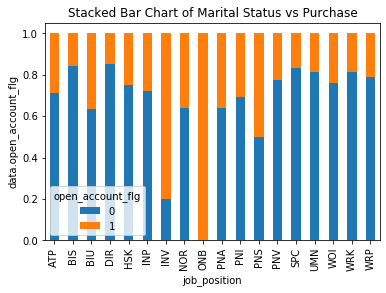

In [51]:
table=pd.crosstab(data.job_position,data.open_account_flg)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('job_position')
plt.ylabel('data.open_account_flg')
plt.savefig('mariral_vs_pur_stack')

In [52]:
good = data[data['open_account_flg'] == 1]
bad = data[data['open_account_flg'] == 0]

In [53]:
# создаем обучающий массив признаков, обучающий массив меток,
# тестовый массив признаков, тестовый массив меток
X_train, X_test, y_train, y_test = train_test_split(data.drop('open_account_flg', axis=1), 
                                                data['open_account_flg'], 
                                                test_size=.3, 
                                                stratify=data['open_account_flg'], 
                                                random_state=100)

In [54]:
#Создаем функцию для проверки признаков по AUC
def importace_auc(train, test):
    train_copy = train.copy()
    test_copy = test.copy()
    #Выбираем нужные нам признаки с числовым типом данных
    col_list = train.select_dtypes(include = ['number']).columns
    #Создаем словарь
    auc_list = []
    for i in col_list:
        #Заменяем все пропущенные значения на медианное
        train_copy[i].fillna(train_copy[i].median(), inplace = True)
        # Создаем экземляр класса PowerTransformer
        power = PowerTransformer(method = 'yeo-johnson', standardize = True).fit(train_copy[[i]])
        #Трансформируем данные тренировочной выборки
        train_copy[i] = power.transform(train_copy[[i]])
        #Заменяем все пропущенные значения на медианное
        test_copy[i].fillna(test_copy[i].median(), inplace = True)
        #Трансформируем данные тестовой выборки
        test_copy[i] = power.transform(test_copy[[i]])
        #Создаем экземпляр класса LogisticRegression
        logreg = LogisticRegression(solver = 'liblinear').fit(train_copy[[i]], y_train)
        #Подсчитываем значение AUC для каждой категории
        auc = roc_auc_score(y_test, logreg.predict_proba(test_copy[[i]])[:, 1])
        #Добавляет в наш пустой список значения auc
        auc_list.append(auc)
    #Создаем датафрейм с показателями auc
    result = pd.DataFrame({'Переменная': col_list, 'AUC': auc_list})
    #Округляем значения и сортируем по убыванию
    result = np.round(result.sort_values(by = 'AUC', ascending = False), 3)
    #Форматирование по цвету
    cm = sns.light_palette('yellow', as_cmap = True)
    return(result.style.background_gradient(cmap = cm))

#запускаем фунцию
importace_auc(X_train, X_test)

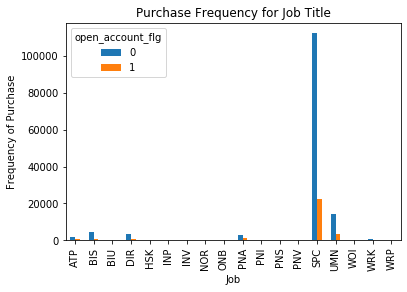

In [55]:
%matplotlib inline
pd.crosstab(data.job_position,data.open_account_flg).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

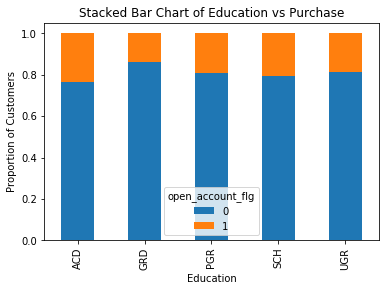

In [56]:
table=pd.crosstab(data.education,data.open_account_flg)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

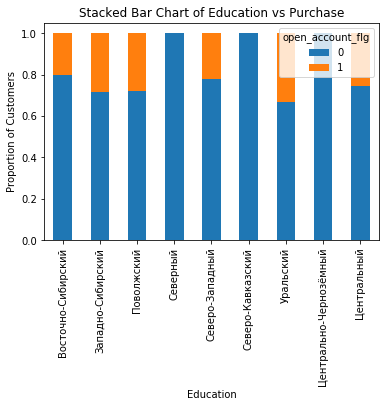

In [57]:
table=pd.crosstab(data[data['education'] == 'ACD'].living_region_area,data.open_account_flg)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

In [58]:
cat_columns = X_train.select_dtypes('object').columns
num_columns = X_train.select_dtypes(include = ['int64', 'float64']).columns

In [59]:
#Трансформер для категориальных переменных
cat_pipe = Pipeline([
    ('imp', SimpleImputer()),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [60]:
#Трансформер для количественных переменных
num_pipe = Pipeline([
    ('imp', SimpleImputer()),
    ('yeo', PowerTransformer(method = 'yeo-johnson', standardize = True))])

In [61]:
#Трансформер для количественных переменных
num_pipe_test = Pipeline([
    ('imp', SimpleImputer()),
    ('yeo', PowerTransformer(method = 'box-cox', standardize = True))])

In [62]:
listok = ['monthly_income', 'region_median_income', 'region_mean_income', 'region_median_to_credit_sum', 'average_zp']

In [63]:
num_columns = list(set(num_columns).difference(set(listok)))
num_columns

['income_to_region_median_income',
 'age',
 'credit_month',
 'share_income',
 'score_shk',
 'overdue_credit_count',
 'credit_count',
 'income_to_credit',
 'score_shk_by_credit_sum',
 'credit_sum',
 'payment',
 'payment_by_score',
 'payment_to_age']

In [64]:
#Конвеер
transformers = [('num', num_pipe, num_columns),
               ('cat', cat_pipe, cat_columns),
               ('num_test', num_pipe_test, listok)]

In [65]:
transformer = ColumnTransformer(transformers=transformers)

In [66]:
#Финальный трансформер
pipe = Pipeline([('tf', transformer), 
                 ('logreg', LogisticRegression(solver='liblinear', random_state=42, C=5))])

In [67]:
#Параметры для модели
param_grid = {
    'tf__num__imp__strategy': ['mean'],
    'tf__cat__imp__strategy': ['constant']
}

In [68]:
#Загрузка экземпляра класса перекрестной проверки
strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [69]:
#Модель GridSearchCV
gs = GridSearchCV(pipe, param_grid, scoring='roc_auc',cv=strat, return_train_score=False)

In [70]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tf',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imp',
                                                                                          SimpleImputer(add_indicator=False,
                                                                               

In [71]:
# Наилучшие значения гиперпараметров
print('Наилучшие значения гиперпараметров: {}'.format(gs.best_params_))
# Наилучшее значение правильности
print('Наилучшее значение правильности: {:.3f}'.format(gs.best_score_))
# Значение правильности
print('Значение правильности на тестовой выборке: {:.3f}'.format(gs.score(X_test, y_test)))

Наилучшие значения гиперпараметров: {'tf__cat__imp__strategy': 'constant', 'tf__num__imp__strategy': 'mean'}
Наилучшее значение правильности: 0.655
Значение правильности на тестовой выборке: 0.650
